In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import utils

In [2]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

In [3]:
np.random.seed(4)
x = generate_3d_data(60)
print(f"x.shape = {x.shape}")

x.shape = (60, 3)


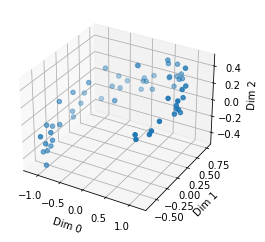

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
ax.set_zlabel('Dim 2')
plt.show()

In [5]:
x_train = x - x.mean(axis=0, keepdims=0)

In [6]:
utils.reset_session()

encoder = keras.models.Sequential([
    keras.layers.Dense(2, input_shape=[3])
])
decoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[2])
])
autoencoder = keras.models.Sequential([
    encoder, 
    decoder
])

optimizer = keras.optimizers.SGD(lr=1.5)
autoencoder.compile(loss='mse', optimizer=optimizer)

history = autoencoder.fit(x_train, x_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2547
Epoch 2/20
2/2 [==============================] - 0s 503us/step - loss: 0.1032
Epoch 3/20
2/2 [==============================] - 0s 1000us/step - loss: 0.0551
Epoch 4/20
2/2 [==============================] - 0s 499us/step - loss: 0.0503
Epoch 5/20
2/2 [==============================] - 0s 501us/step - loss: 0.0839
Epoch 6/20
2/2 [==============================] - 0s 500us/step - loss: 0.2223
Epoch 7/20
2/2 [==============================] - 0s 1000us/step - loss: 0.0913
Epoch 8/20
2/2 [==============================] - 0s 499us/step - loss: 0.0320
Epoch 9/20
2/2 [==============================] - 0s 1000us/step - loss: 0.0242
Epoch 10/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 11/20
2/2 [==============================] - 0s 999us/step - loss: 0.0142
Epoch 12/20
2/2 [==============================] - 0s 999us/step - loss: 0.0102
Epoch 13/20
2/2 [==============================] -

In [7]:
codings = encoder.predict(x_train)
print(f"codings.shape = {codings.shape}")

codings.shape = (60, 2)


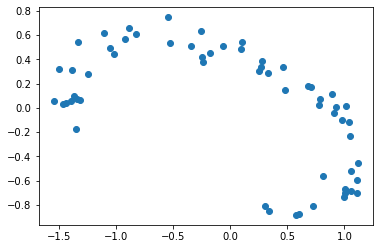

In [8]:
plt.figure()
plt.scatter(codings[:, 0], codings[:, 1])
plt.show()